# Bibliotecas

In [27]:
from madeiras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
from UQpy.distributions import Normal
from UQpy.reliability import FORM
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel

# Teste da função objetivo

### _Upload_ dos dados de projetos

In [28]:
df = pd.read_excel("beam_data_02.xlsx")
df = df.to_dict(orient="records")
df = df[0]
df

{'l (cm)': 400,
 'b_wpista (cm)': 900,
 'tipo_secao_longarina': 'Circular',
 'tipo_secao_tabuleiro': 'Retangular',
 'p_gk (kPa)': 1,
 'p_rodak (kN)': 40,
 'p_qk (kPa)': 4,
 'a (m)': 1.5,
 'classe_carregamento': 'permanente',
 'classe_madeira': 'madeira natural',
 'classe_umidade': 1,
 'gamma_g': 1.35,
 'gamma_q': 1.5,
 'gamma_wf': 1.4,
 'gamma_wc': 1.8,
 'psi_2': 0.3,
 'phi': 0.6,
 'densidade longarina (kg/m³)': 420,
 'resistência característica à flexão longarina (MPa)': 40,
 'resistência característica ao cisalhamento longarina (MPa)': 4,
 'módulo de elasticidade à flexão longarina (GPa)': 14,
 'densidade tabuleiro (kg/m³)': 420,
 'resistência característica à flexão tabuleiro (MPa)': 40}

### Dados dos intervalos das vars de projeto

Carregando aqui pois é um valor esperado pela classe `ProjetoOtimo`

In [29]:
ds    = [30, 150]
esps  = [30, 200]
bws   = [5, 60]
hs    = [5, 60]

### Solução desejada

In [30]:
d   = 45
esp = 120
bw  = 10
h   = 30

### Instância de uma viga

In [31]:
df_teste_proj = df.copy()
viga = ProjetoOtimo(
                        l=df_teste_proj["l (cm)"],
                        p_gk=df_teste_proj["p_gk (kPa)"],
                        p_rodak=df_teste_proj["p_rodak (kN)"],
                        p_qk=df_teste_proj ["p_qk (kPa)"],
                        a=df_teste_proj ["a (m)"],
                        classe_carregamento=df_teste_proj["classe_carregamento"],
                        classe_madeira=df_teste_proj["classe_madeira"],
                        classe_umidade=df_teste_proj["classe_umidade"],
                        gamma_g=df_teste_proj["gamma_g"],
                        gamma_q=df_teste_proj["gamma_q"],
                        gamma_wc=df_teste_proj["gamma_wc"],
                        gamma_wf=df_teste_proj["gamma_wf"],
                        psi2=df_teste_proj["psi_2"],
                        phi=df_teste_proj["phi"],
                        densidade_long=df_teste_proj["densidade longarina (kg/m³)"],
                        densidade_tab=df_teste_proj["densidade tabuleiro (kg/m³)"],
                        f_mk_long=df_teste_proj["resistência característica à flexão longarina (MPa)"],
                        f_vk_long=df_teste_proj["resistência característica ao cisalhamento longarina (MPa)"],
                        e_modflex_long=df_teste_proj["módulo de elasticidade à flexão longarina (GPa)"],
                        f_mk_tab=df_teste_proj["resistência característica à flexão tabuleiro (MPa)"],
                        d_min=ds[0],
                        d_max=ds[1],
                        esp_min=esps[0],
                        esp_max=esps[1],
                        bw_min=bws[0],
                        bw_max=bws[1],
                        h_min=hs[0],
                        h_max=hs[1],
                  )

### Avaliação do método evaluate

somente para conferência do funcionamento

In [32]:
x_manual = np.array([[d, esp, bw, h]])   # d, esp, bw, h
out = viga.evaluate(x_manual, return_values_of=["F", "G"])
f = out[0]
g = out[1]
print(f, g)

[[ 0.18904313 -0.12315393]] [[-0.20033448 -0.36011073 -0.70458248 -0.44554317]]


### Avaliação do método para cálculo das restrições

Permite ver todas as saídas do vigaa

In [33]:
out = viga.calcular_objetivos_restricoes_otimizacao(d, esp, bw, h)
out

([0.1890431280879833, -0.12315392836778931],
 [-0.20033448126881098,
  -0.360110730569633,
  -0.7045824767849436,
  -0.4455431732999997],
 {'m_sd [kN.m]': 122.63911604013992,
  'k_mod1': 0.6,
  'k_mod2': 1.0,
  'k_mod': 0.6,
  'sigma_x [kPa]': 13708.551749677525,
  'f_md [kPa]': 17142.85714285714,
  'g_otimiz [-]': -0.20033448126881098,
  'g_confia [kPa]': 3434.3053931796167,
  'analise': 'OK'},
 {'v_sd [kN]': 101.76999104013991,
  'f_vd [kPa]': 1333.3333333333333,
  'tau_sd [kPa]': 853.1856925738226,
  'g_otimiz [-]': -0.360110730569633,
  'g_confia [kPa]': 480.14764075951064,
  'analise': 'OK'},
 {'delta_lim_total [m]': 0.016,
  'delta_lim_variavel [m]': 0.011111111111111112,
  'delta_fluencia [m]': 0.001970462853884629,
  'delta_qk [m]': 0.0032824169246117372,
  'g_otimiz [-]': -0.7045824767849436,
  'g_confia [m]': 0.014029537146115371,
  'of [-]': 0.12315392836778931,
  'analise': 'OK'},
 {'area [m2]': 0.1590431280879833,
  'w_x [m3]': 0.00894617595494906,
  'i_x [m4]': 0.00201288

In [22]:
out[0]

[0.1890431280879833, -0.12315392836778931]

In [23]:
out[1]

[-0.20033448126881098,
 -0.360110730569633,
 -0.7045824767849436,
 -0.4455431732999997]

# Execução da otimização

### Chamando o NSGA-II

In [24]:
res_nsga = chamando_nsga2(df.copy(), ds, esps, bws, hs)
res_nsga

,d [cm],esp [cm],bw [cm],h [cm],area [m²],delta [-],flex lim beam [(Ms-Mr)/Mr],cis lim beam [(Vs-Vr)/Vr],delta lim beam [(ps-pr)/pr],flex lim deck [(Ms-Mr)/Mr]
0,41.013032,30.329638,5.000000,5.001950,0.134610,0.152469,-1.902424e-04,-0.246549,-0.571847,-6.439194
1,43.017732,199.856040,5.000000,59.989809,0.175335,0.184641,-3.803451e-07,-0.206996,-0.646250,-0.427305
2,42.367502,174.377693,5.000000,41.699967,0.161829,0.175384,-6.843751e-06,-0.219915,-0.624029,-0.010894
3,42.519167,186.978669,5.000000,43.821778,0.163901,0.177627,-2.289636e-05,-0.216929,-0.629364,-0.016898
4,42.407859,177.617431,5.000000,42.245713,0.162371,0.175928,-1.432909e-04,-0.219241,-0.625458,-0.012094
...,...,...,...,...,...,...,...,...,...,...
495,42.084249,149.093350,5.000001,37.403906,0.157803,0.170887,-3.183337e-04,-0.225782,-0.613804,-0.011314
496,41.042437,38.321734,5.000000,5.044803,0.134821,0.153078,-6.705610e-05,-0.245872,-0.573073,-3.432091
497,41.778349,120.999725,5.000000,32.011318,0.153091,0.166085,-1.254956e-06,-0.231499,-0.602368,-0.014880
498,42.592866,193.207702,5.000000,44.620112,0.164793,0.178615,-2.147700e-04,-0.215643,-0.631923,-0.010054


### Tabela de resultados da fronteira

In [25]:
print(
            res_nsga.to_latex(
            column_format=''.join(['c' for _ in range(len(res_nsga.columns) + 1)]),
            float_format="%.3f",
            escape=False,
            caption='Tensões para diferentes combinações de carga',
            label='tab:tensoes_completas',
            position='htbp'
            )
    )

\begin{table}[htbp]
\caption{Tensões para diferentes combinações de carga}
\label{tab:tensoes_completas}
\begin{tabular}{ccccccccccc}
\toprule
 & d [cm] & esp [cm] & bw [cm] & h [cm] & area [m²] & delta [-] & flex lim beam [(Ms-Mr)/Mr] & cis lim beam [(Vs-Vr)/Vr] & delta lim beam [(ps-pr)/pr] & flex lim deck [(Ms-Mr)/Mr] \\
\midrule
0 & 41.013 & 30.330 & 5.000 & 5.002 & 0.135 & 0.152 & -0.000 & -0.247 & -0.572 & -6.439 \\
1 & 43.018 & 199.856 & 5.000 & 59.990 & 0.175 & 0.185 & -0.000 & -0.207 & -0.646 & -0.427 \\
2 & 42.368 & 174.378 & 5.000 & 41.700 & 0.162 & 0.175 & -0.000 & -0.220 & -0.624 & -0.011 \\
3 & 42.519 & 186.979 & 5.000 & 43.822 & 0.164 & 0.178 & -0.000 & -0.217 & -0.629 & -0.017 \\
4 & 42.408 & 177.617 & 5.000 & 42.246 & 0.162 & 0.176 & -0.000 & -0.219 & -0.625 & -0.012 \\
5 & 42.562 & 191.313 & 5.000 & 44.115 & 0.164 & 0.178 & -0.000 & -0.216 & -0.631 & -0.000 \\
6 & 42.210 & 160.905 & 5.000 & 39.303 & 0.160 & 0.173 & -0.000 & -0.223 & -0.618 & -0.003 \\
7 & 41.164 & 55.

### Visualização da fronteira

NameError: name 'data' is not defined

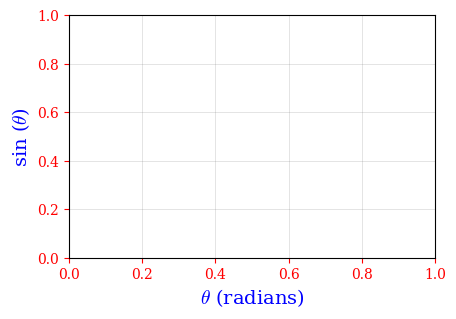

In [26]:
### Figure name and DPI
dpi = 600                                                   # Change as you wish
name = 'scatter_example_sine_scatter'           # Change as you wish

### Chart dimensions (in centimeters)
b_cm = 12                                                   # Change as you wish
h_cm = 8                                                    # Change as you wish
inches_to_cm = 1 / 2.54
b_input = b_cm * inches_to_cm
h_input = h_cm * inches_to_cm

### Axis and labels (For LateX font format use the dollar sign $)
label_x = '$\\theta$ (radians)'                             # Change as you wish
label_y = 'sin ($\\theta$)'                                 # Change as you wish
size_label = 14                                             # Change as you wish
color_label = 'blue'                                        # or hexadecimal. Change as you wish
size_axis = 10                                              # Change as you wish
color_axis = 'red'                                          # or hexadecimal. Change as you wish

### Scatter
alpha_scatter = 1.0                                             # Change as you wish
color_scatter = 'blue'                                          # Change as you wish
size_scatter = 25                                               # Change as you wish

### Grid
on_or_off = True
line_width_grid = 0.5                                       # Change as you wish
alpha_grid = 0.3                                            # Change as you wish
style_grid = '-'                                            # Change as you wish
color_grid = 'gray'                                         # or hexadecimal. Change as you wish

### Figure
fig, ax = plt.subplots(figsize=(b_input, h_input))
ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

### Title. Do you need a title? Use the cell bellow:
# ax.set_title('Sine Wave Plot', fontsize=16)

### Config grid
plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

### Plot data
ax.scatter(data['x'], data['y'], alpha=alpha_scatter, color=color_scatter, s=size_scatter)

### Save. Do you need save? Use the cell bellow:
fig.savefig(f'z_{name}_pt.png', dpi=dpi, bbox_inches='tight')
plt.show()

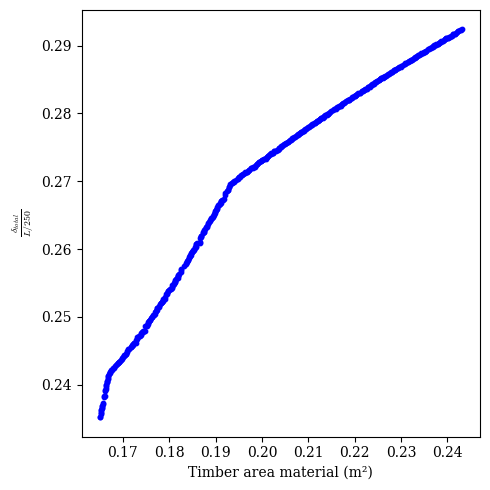

In [ ]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [-]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\frac{\delta_{total}}{L/250}$")
plt.tight_layout()
plt.show()

# Monte Carlo

Total amostras: 25000
Viáveis: 21381


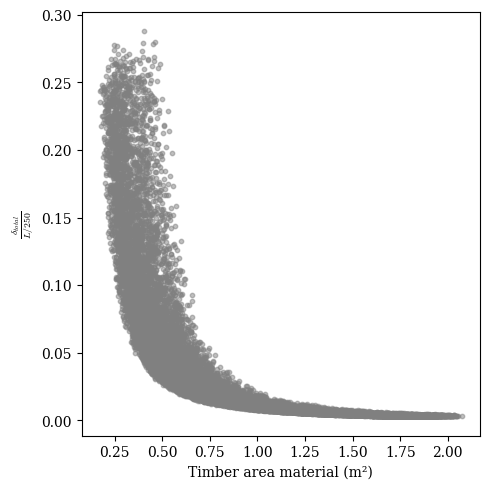

In [ ]:
N = 25000
rng = np.random.default_rng(123)

# amostra uniformemente no intervalo do vigaa
d_mc = rng.uniform(viga.xl[0], viga.xu[0], size=N)
X_mc = d_mc.reshape(-1, 1)   # shape (N,1)
esp_mc = rng.uniform(viga.xl[1], viga.xu[1], size=N)
bw_mc = rng.uniform(viga.xl[2], viga.xu[2], size=N)
h_mc = rng.uniform(viga.xl[3], viga.xu[3], size=N)
X_mc = np.column_stack((d_mc, esp_mc, bw_mc,  h_mc))  # shape (N,4)

# avalia em lote
out = viga.evaluate(X_mc, return_values_of=["F", "G"])
F = np.asarray(out[0])   # shape (N,2)
G = np.asarray(out[1])   # shape (N,4)

# filtro de viabilidade: todas restrições <= 0
mask_feas = np.all(G <= 0.0, axis=1)

F_feas = F[mask_feas]
G_feas = G[mask_feas]
X_feas = X_mc[mask_feas]

print("Total amostras:", N)
print("Viáveis:", int(mask_feas.sum()))

# ---------------------------
# Scatter plot (f1 vs f2)
# ---------------------------
# Se seu f2 = -delta, converta para delta positivo no plot:
F_plot = F_feas.copy()
F_plot[:, 1] = -F_plot[:, 1]

plt.rc('font', family='serif')
plt.figure(figsize=(5, 5))
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.5, label="Feasible Samples")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\frac{\delta_{total}}{L/250}$")
plt.tight_layout()
plt.show()

# Unindo as duas soluções (OTM + MC)

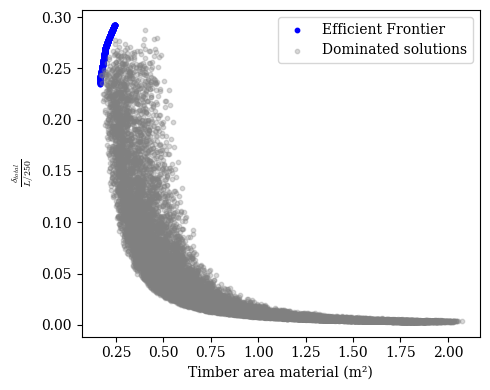

In [ ]:
plt.rc('font', family='serif')
plt.figure(figsize=(5, 4))
plt.scatter(res_nsga["area [m²]"].to_list(), res_nsga["delta [-]"].to_list(), label="Efficient Frontier", color='blue', s=10)
plt.scatter(F_plot[:, 0], F_plot[:, 1], s=10, color='gray', alpha=0.3, label="Dominated solutions")
plt.xlabel(r"Timber area material (m²)")
plt.ylabel(r"$\frac{\delta_{total}}{L/250}$")
plt.legend(loc='upper right',)
plt.tight_layout()
plt.show()

In [ ]:
# df = pd.read_excel("beam_data.xlsx")
# df = df.loc[0]
# p_gk = float(df["p_gk (kN/m²)"])
# p_rodak = float(df["p_rodak (kN)"])
# p_qk = float(df["p_qk (kN/m²)"])
# a = float(df["a (m)"])
# l = float(df["l (cm)"])
# classe_carregamento = df["classe_carregamento"]
# classe_madeira = df["classe_madeira"]
# classe_umidade = df["classe_umidade"]
# f_mk = float(df["resistência característica à flexão longarina (MPa)"])
# f_vk = float(df["resistência característica ao cisalhamento longarina (MPa)"])
# e_modflex = float(df["módulo de elasticidade à flexão longarina (GPa)"])
# f_mktab = float(df["resistência característica à flexão tabuleiro (MPa)"])
# densidade_long = float(df["densidade longarina (kg/m³)"])
# densidade_tab = float(df["densidade tabuleiro (kg/m³)"])
# d = 35.
# esp = 120.0
# bw = 11.0
# h = 30.0

In [ ]:
# samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
# params = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flexao"]
# obj_confia(samples, params)

array([25447.1703073])

In [ ]:
# beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao")
# beta, pf

(8.146937967052141, 1.8662751537927904e-16)

In [ ]:
# sm, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flexao", method="IS")
# beta, pf

(9.262340089798409, 0.0)

In [ ]:
# df = pd.DataFrame(sm.samples)
# df


,0,1,2,3,4,5,6,7,8
0,0.908433,40.332522,3.680689,42.742388,14.344494,17.508690,32.460459,363.624352,321.373159
1,0.815210,42.159989,4.063433,36.991407,17.632885,17.861491,33.477062,412.155191,422.160034
2,0.799264,35.742486,7.442721,43.996842,18.976632,18.566490,27.620866,356.175141,411.276496
3,0.875144,50.918949,5.299062,46.958649,15.474678,16.021081,29.639504,389.668990,374.435713
4,0.914221,40.881068,4.524493,41.806236,17.973795,16.693741,37.473919,351.483560,378.063540
...,...,...,...,...,...,...,...,...,...
99995,0.837711,51.780019,4.148923,44.492855,18.499693,20.023416,32.657034,355.512243,335.119220
99996,0.868688,36.253195,5.017667,38.808164,14.830742,18.018763,29.027935,421.823851,368.467238
99997,0.960407,37.863507,4.515832,41.635987,17.450502,17.170057,32.161794,392.374890,419.369290
99998,0.878409,45.286923,4.494241,41.610034,20.032779,16.836773,33.125313,407.314027,336.596218


In [ ]:
# model = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=params)
# rmodel = RunModel(model=model)
# rmodel.run(samples=sm.samples)
# rmodel.qoi_list

[array([21203.81769976]),
 array([17272.92381294]),
 array([19285.47096816]),
 array([22510.04121298]),
 array([19929.09745984]),
 array([21090.62068681]),
 array([22967.84867581]),
 array([26251.66869068]),
 array([21528.63905686]),
 array([17159.31504063]),
 array([19674.10528608]),
 array([19241.28181536]),
 array([20375.92455345]),
 array([19718.07142622]),
 array([21164.91341745]),
 array([20832.03332077]),
 array([19626.85429519]),
 array([24037.15547393]),
 array([22669.94093983]),
 array([16859.53926966]),
 array([21311.49153791]),
 array([21839.39979539]),
 array([14315.10261952]),
 array([20238.98679416]),
 array([26717.86927243]),
 array([19594.3799461]),
 array([20972.57610908]),
 array([23824.57942433]),
 array([19206.29879346]),
 array([23787.50057683]),
 array([23131.15320423]),
 array([16847.45635081]),
 array([19591.38469673]),
 array([23286.6232483]),
 array([18685.26007994]),
 array([22537.113058]),
 array([22527.96765875]),
 array([23221.26413401]),
 array([19971.96

In [ ]:
# samples = np.array([[p_gk, p_rodak, p_qk, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab]])
# paramss = [a, l, classe_carregamento, classe_madeira, classe_umidade, d, esp, bw, h, "flecha"]
# obj_confia(samples, paramss)

array([0.02892324])

In [ ]:
# beta, pf = chamando_form(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha")
# beta, pf

ZeroDivisionError: float division by zero

In [ ]:
# sf, beta, pf = chamando_sampling(p_gk, p_rodak, p_qk, a, l, classe_carregamento, classe_madeira, classe_umidade, f_mk, f_vk, e_modflex, f_mktab, densidade_long, densidade_tab, d, esp, bw, h, "flecha", method="IS")
# beta, pf

(9.262340089798409, 0.0)

In [ ]:
# sf.samples

array([[  2.52342535,  40.33252213,   3.68068896, ...,  32.46045932,
        363.62435163, 321.37315897],
       [  2.26447229,  42.15998854,   4.06343262, ...,  33.47706178,
        412.15519087, 422.16003432],
       [  2.22017855,  35.74248629,   7.44272145, ...,  27.62086575,
        356.17514082, 411.27649584],
       ...,
       [  2.66779704,  37.86350724,   4.51583239, ...,  32.16179419,
        392.37488993, 419.36929034],
       [  2.44002475,  45.28692299,   4.49424053, ...,  33.12531311,
        407.31402703, 336.59621776],
       [  2.46884879,  40.33102358,   4.2953076 , ...,  36.80060692,
        347.39322028, 387.22616197]])

In [ ]:
# modelf = PythonModel(model_script='madeiras.py', model_object_name='obj_confia', params=paramss)
# rmodelf = RunModel(model=modelf)
# rmodelf.run(samples=sf.samples)
# rmodelf.qoi_list

[array([0.02839609]),
 array([0.0281402]),
 array([0.02583984]),
 array([0.02628904]),
 array([0.02722235]),
 array([0.02728186]),
 array([0.02839284]),
 array([0.02762287]),
 array([0.02910103]),
 array([0.02846391]),
 array([0.02843869]),
 array([0.02681531]),
 array([0.0290088]),
 array([0.02728188]),
 array([0.02808193]),
 array([0.0285302]),
 array([0.02773661]),
 array([0.02736313]),
 array([0.02898355]),
 array([0.02839042]),
 array([0.02472564]),
 array([0.02594098]),
 array([0.02785667]),
 array([0.02879716]),
 array([0.02734339]),
 array([0.02893233]),
 array([0.02838487]),
 array([0.02851866]),
 array([0.02802299]),
 array([0.02811531]),
 array([0.02886485]),
 array([0.02789539]),
 array([0.02652382]),
 array([0.02597454]),
 array([0.02741641]),
 array([0.02513166]),
 array([0.02752602]),
 array([0.02816286]),
 array([0.02836834]),
 array([0.02792772]),
 array([0.02882565]),
 array([0.02761217]),
 array([0.02822412]),
 array([0.02809841]),
 array([0.02896006]),
 array([0.026

In [ ]:
# import numpy as np

# valores = np.array(rmodelf.qoi_list).flatten()
# quantidade_negativos = np.count_nonzero(valores < 0.0)
# quantidade_negativos

0